## Correlation between mainshocks and surface mass loading

#### - declustered with Mizrahi's ETAS code

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from global_land_mask import globe
import scipy.stats as stats
import os
import importlib

# file containing functions:
import loadquakes

In [2]:
# Load datasets
dataset_path = '/data/fast1/surface-load/'
ds = xr.open_dataset(dataset_path + "GRCTellus.JPL.200204_202102.GLO.RL06M.MSCNv02CRI.nc")
# catalog = pd.read_csv('eq_200204_202102.csv')
# catalog["time"] = catalog["time"].astype("datetime64")
catalog = pd.read_csv(dataset_path + 'ind_and_bg_probs.csv')
catalog["time"] = catalog["time"].astype("datetime64")

In [3]:
mainshock = catalog[catalog['P_triggered']<.9]

mainshock

target_id  latitude  longitude                    time  magnitude  \
49           53    2.6675   -59.5879 2021-01-31 19:05:14.367        5.5   
50           54  -13.9672   121.8641 2021-01-29 19:47:55.783        5.7   
54           58   18.2516   -64.0708 2021-01-24 23:21:41.140        5.4   
73           77  -37.1225   -17.2548 2021-01-15 10:45:21.876        5.6   
80           84   51.2811   100.4383 2021-01-11 21:32:59.015        6.7   
...         ...       ...        ...                     ...        ...   
9426       9430   84.2530     0.4080 2006-02-14 00:39:49.590        5.4   
9427       9431  -62.2100  -158.1880 2006-02-13 03:23:35.610        5.4   
9436       9440   66.2968  -142.6856 2006-02-05 08:17:01.373        5.4   
9437       9441    1.0930   -90.4600 2006-02-04 09:17:04.090        5.9   
9446       9450    1.6580   118.0090 2006-01-31 16:40:50.520        5.4   

                                geometry            mu  P_triggered  \
49               POINT (2.6675 -59.5879)  8.774521e-11     0.081552   
50             POINT (-13.9672 121.8641)  8.774521e-11     0.634690   
54    POINT (18.2516 -64.07080000000001)  8.774521e-11     0.829974   
73             POINT (-37.1225 -17.2548)  8.774521e-11     0.871333   
80              POINT (51.2811 100.4383)  8.774521e-11     0.729328   
...                                  ...           ...          ...   
9426     POINT (84.25299999999999 0.408)  8.774521e-11     0.488028   
9427             POINT (-62.21 -158.188)  8.774521e-11     0.878727   
9436           POINT (66.2968 -142.6856)  8.774521e-11     0.494733   
9437    POINT (1.093 -90.45999999999999)  8.774521e-11     0.700162   
9446               POINT (1.658 118.009)  8.774521e-11     0.759523   

      P_background  
49        0.918448  
50        0.365310  
54        0.170026  
73        0.128667  
80        0.270672  
...            ...  
9426      0.511972  
9427      0.121273  
9436      0.505267  
9437      0.299838  
9446      0.240477  

[510 rows x 9 columns]

In [4]:
pd.options.mode.chained_assignment = None

In [5]:
def get_mass(eq):
    mass_change = ds.sel(lat=(eq["latitude"]),lon=(eq["longitude"]),time=(eq["time"]), method="nearest")
    mass_change = mass_change["lwe_thickness"]
    return mass_change.data
  
mainshock['dmass'] = mainshock.apply(lambda row: get_mass(row), axis=1)

In [6]:
mainshock['dmass'] # surface load during times of an earthquake occurence

49        1.3731302353370145
50         4.093674329158276
54         6.780462698046383
73        2.3130031085407143
80       -2.9115654573012817
                ...         
9426     -3.0843078240522606
9427    -0.11752787606497095
9436     -1.9933044594319858
9437     -0.3626862696730009
9446      0.8901179295294139
Name: dmass, Length: 510, dtype: object

In [7]:
importlib.reload(loadquakes)

<module 'loadquakes' from '/home/amand4/notebooks/surface-load-quakes/loadquakes.py'>

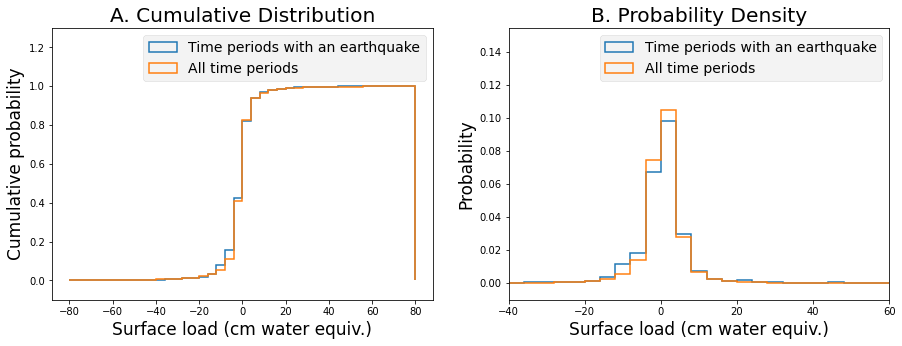

In [8]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plt.style.use('fivethirtyeight')

loadquakes.plot_hist(np.array(ds['lwe_thickness'].data.flatten()), np.array(mainshock.dmass), ax1, ax2, 
              'A. Cumulative Distribution', 'B. Probability Density')

## Using Bayes' Theorem:

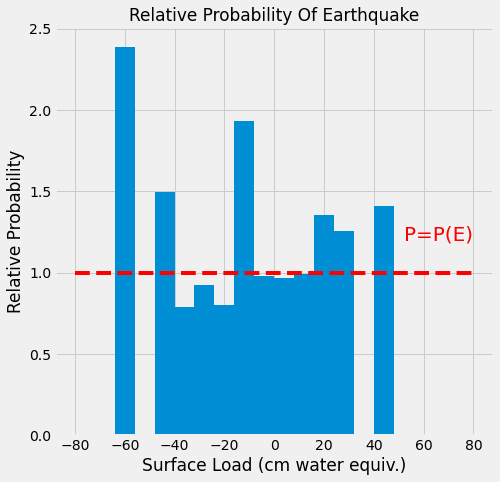

In [9]:
fig,ax = plt.subplots(figsize=(7,7))
plt.style.use('fivethirtyeight')
loadquakes.plot_rel_hist(np.array(ds['lwe_thickness'].data.flatten()), np.array(mainshock.dmass), ax, 
              "Relative Probability Of Earthquake")

In [11]:
# takes very long time to load:

# loadquakes.calc_stats(np.array(mainshock.dmass),np.array(ds['lwe_thickness'].data.flatten()))

## Correlation between reconstructed D values and seismic activity


In [12]:
# Loading D values from pca grace

D_values = []
for filenumber in np.arange(1,7):
    filename = os.path.join('/data/fast1/surface-load/pca/','D_%d.csv'%filenumber)
    D_values.append( np.loadtxt(filename, delimiter=',') )

In [13]:
# Loading D_eq values from pca grace

D_eq_values = []
for filenumber in np.arange(1,7):
    filename = os.path.join('/data/fast1/surface-load/pca/','D_eq_%d.csv'%filenumber)
    D_eq_values.append( np.loadtxt(filename, delimiter=',') )
    # asumes filenames like 'D_eq_values_1.csv', 'D_eq_values_2.csv', and so on

In [ ]:
# stats = []

# for i in range(6):
#     stats.append(calc_stats(D_eq_values[i], D_values[i]))

# pd.DataFrame(stats)


## Correlation between detrended D values and seismic activity

In [14]:
# Loading detrended data

D_detrend_eq_values = []
for filenumber in np.arange(1,7):
    D_detrend_eq_values.append( np.loadtxt('D_detrend_eq_%d.csv'%filenumber, delimiter=',') )

D_detrend_values = []
for filenumber in np.arange(1,7):
    D_detrend_values.append( np.loadtxt('D_detrend_%d.csv'%filenumber, delimiter=',') )

In [15]:
D_detrend_values[1]

array([[-0.24389828, -0.24098377,  0.13128741, ...,  0.10751991,
        -0.01900568, -0.09380543],
       [-0.24389828, -0.24098377,  0.13128741, ...,  0.10751991,
        -0.01900568, -0.09380543],
       [-0.24389828, -0.24098377,  0.13128741, ...,  0.10751991,
        -0.01900568, -0.09380543],
       ...,
       [-1.65856852, -1.63874914,  0.89278681, ...,  0.73116197,
        -0.12924334, -0.63790006],
       [-1.65856852, -1.63874914,  0.89278681, ...,  0.73116197,
        -0.12924334, -0.63790006],
       [-1.65856852, -1.63874914,  0.89278681, ...,  0.73116197,
        -0.12924334, -0.63790006]])

In [ ]:
# stats_detrend = []

# for i in range(6):
#     stats_detrend.append(calc_stats(D_detrend_eq_values[i], D_detrend_values[i]))

## Maps 

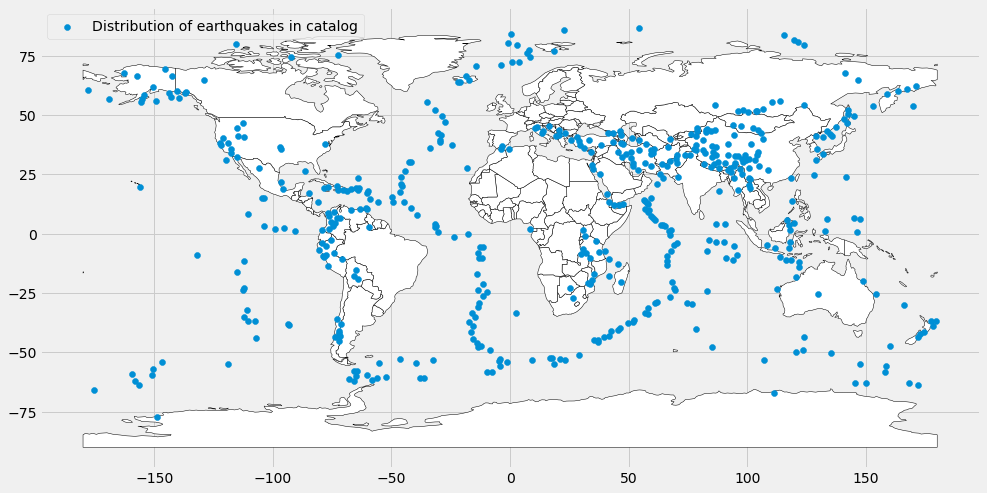

In [16]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(mainshock.longitude, mainshock.latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# ax = world.plot(color='white', edgecolor='black', figsize=(8,6))
ax = world.plot(color='white', edgecolor='black', figsize=(15,10))
gdf.plot(ax=ax, label='Distribution of earthquakes in catalog')
leg = ax.legend()

# gdi = gpd.GeoDataFrame(df_ind, geometry=gpd.points_from_xy(df_ind.longitude, df_ind.latitude))
# gdi.plot(ax=ax, markersize = 5)

# plt.show()

In [17]:
loadquakes.plot_map(mainshock['dmass'], mainshock[mainshock['dmass'] > 25],"Surface load > 25")

AttributeError: module 'loadquakes' has no attribute 'plot_map'

## ------------- have not edited below this line --------------

### Maps for not detrended analyses

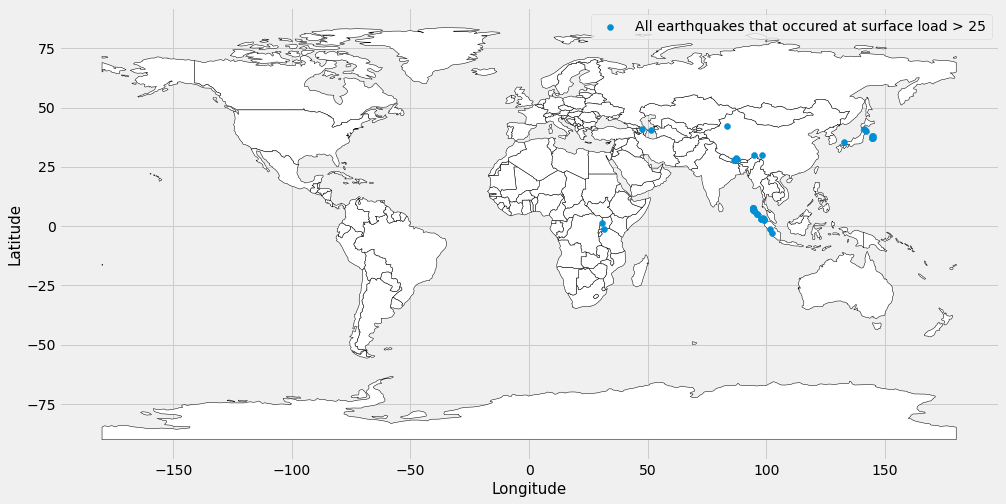

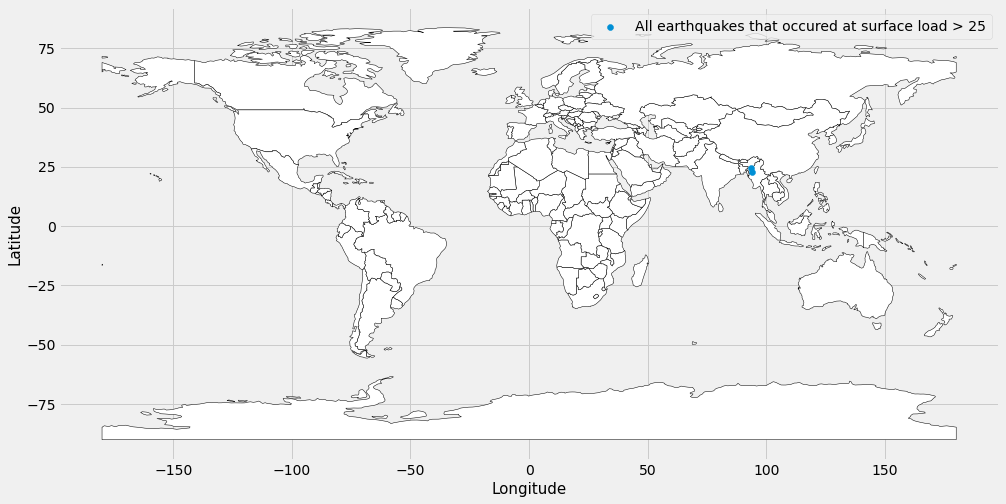

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


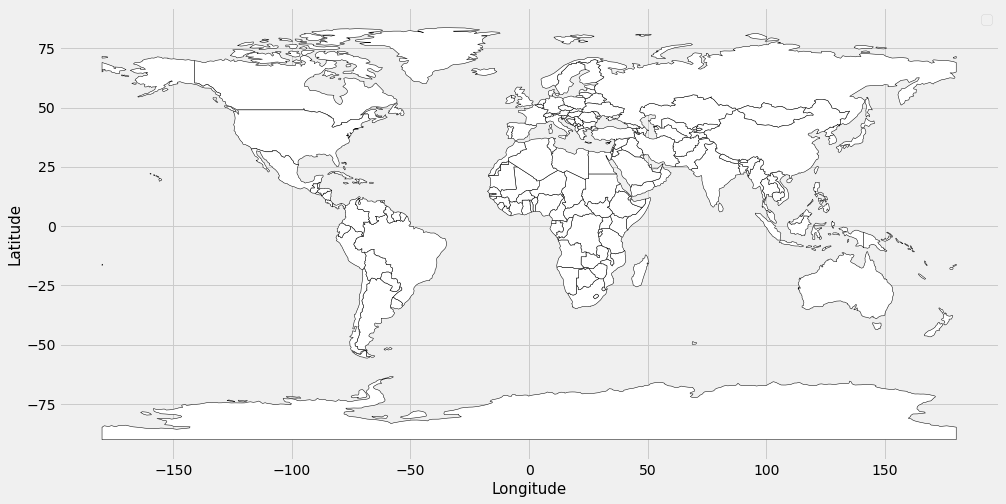

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


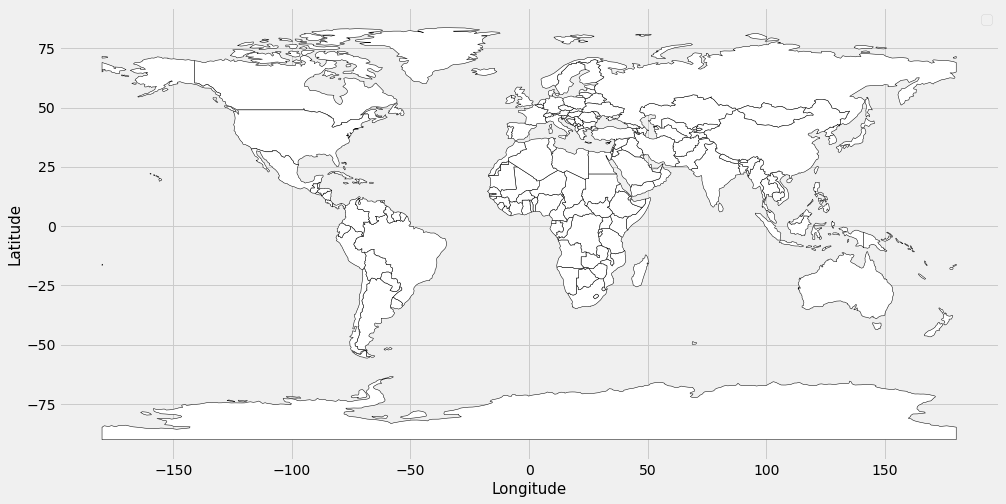

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


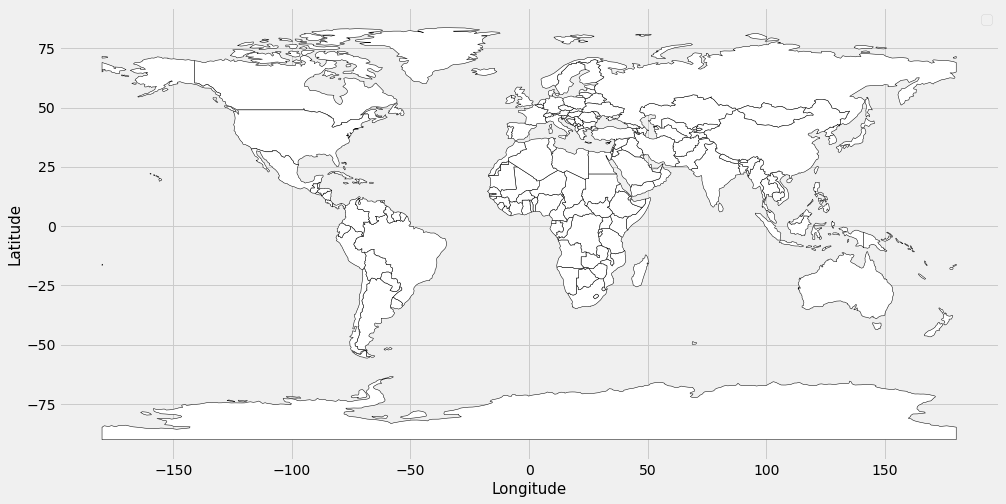

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


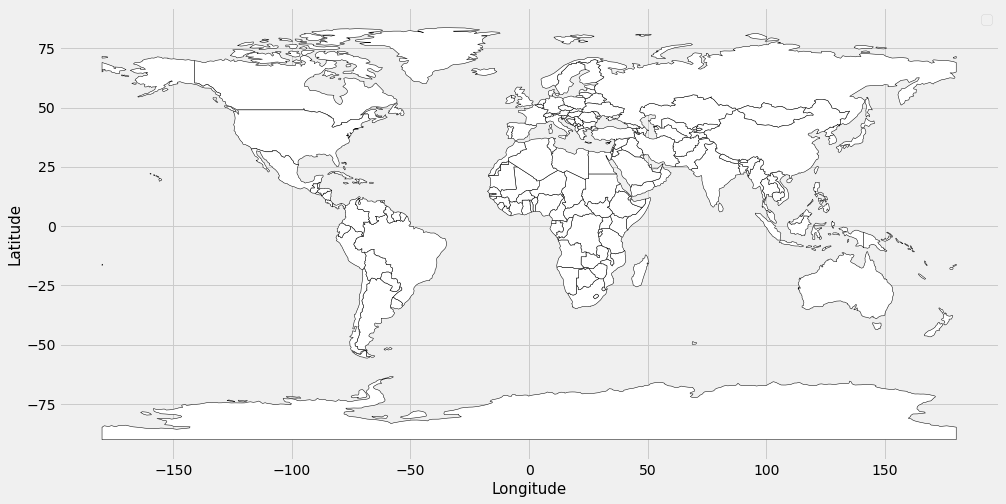

In [32]:
for i in range(6):
    loadquakes.plot_map(25, D_eq_values[i])

### Maps for detrended analyses

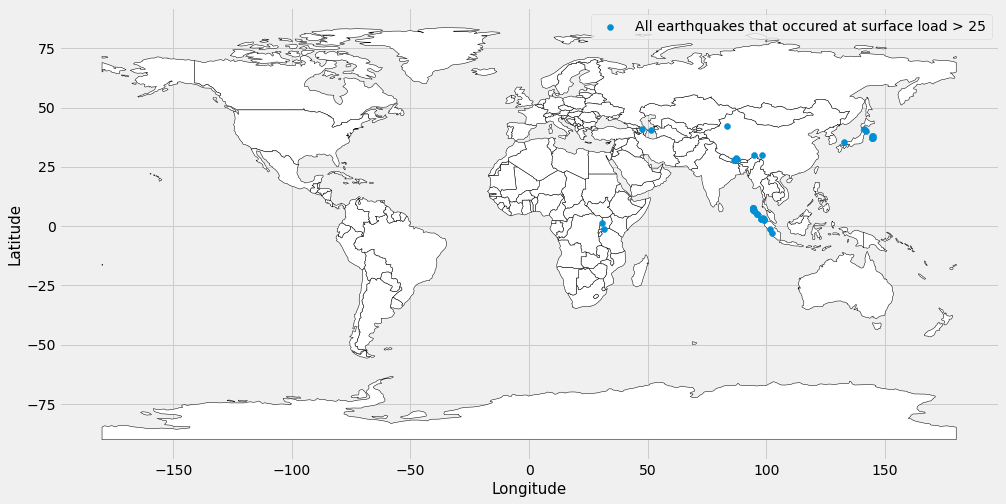

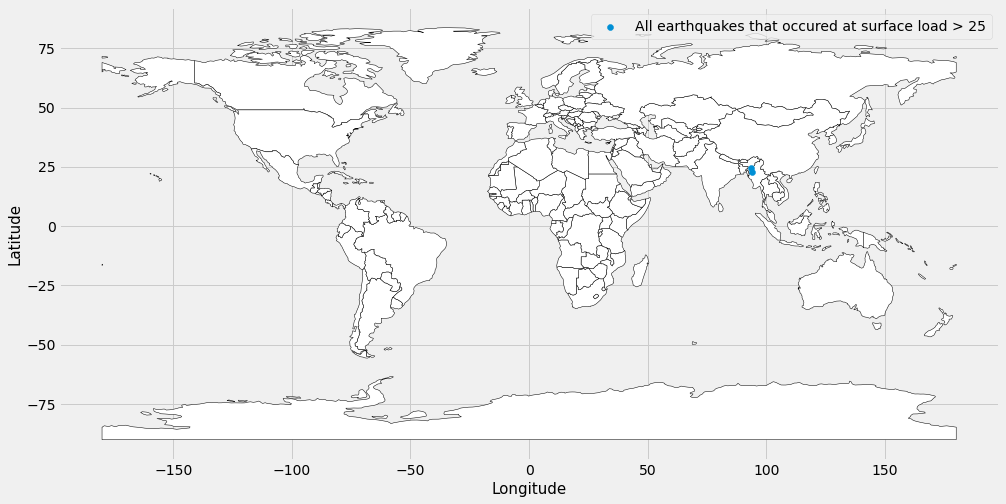

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


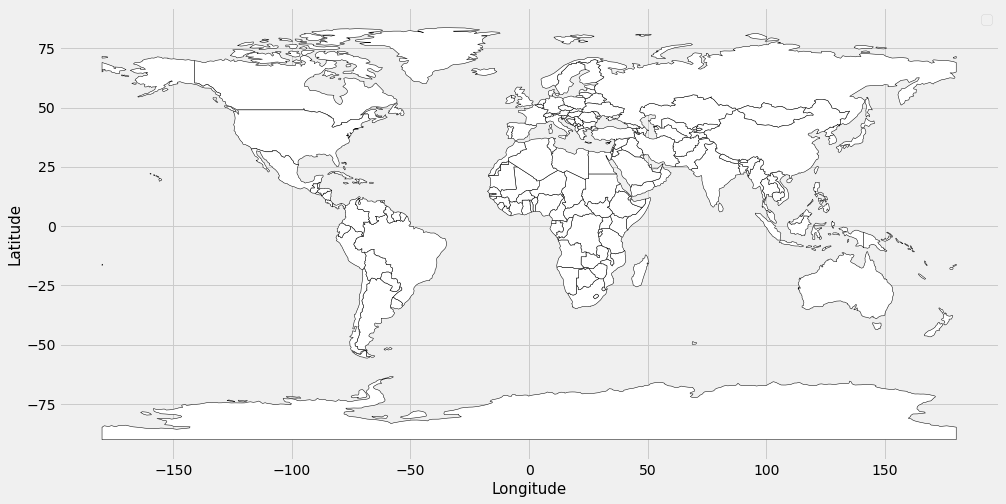

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


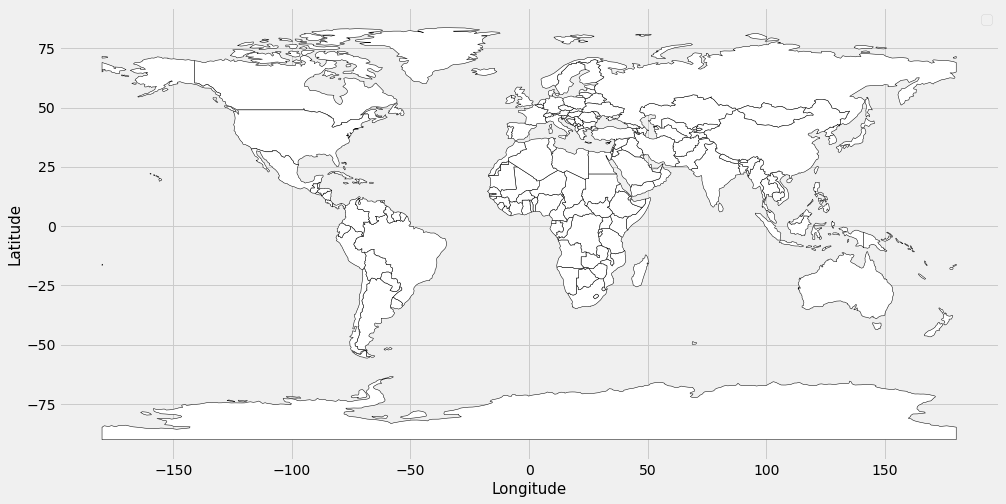

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


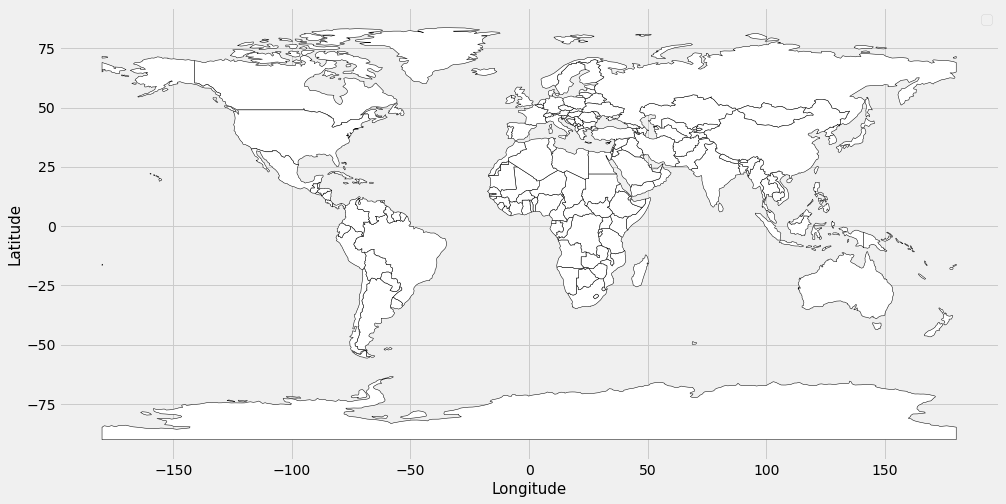

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


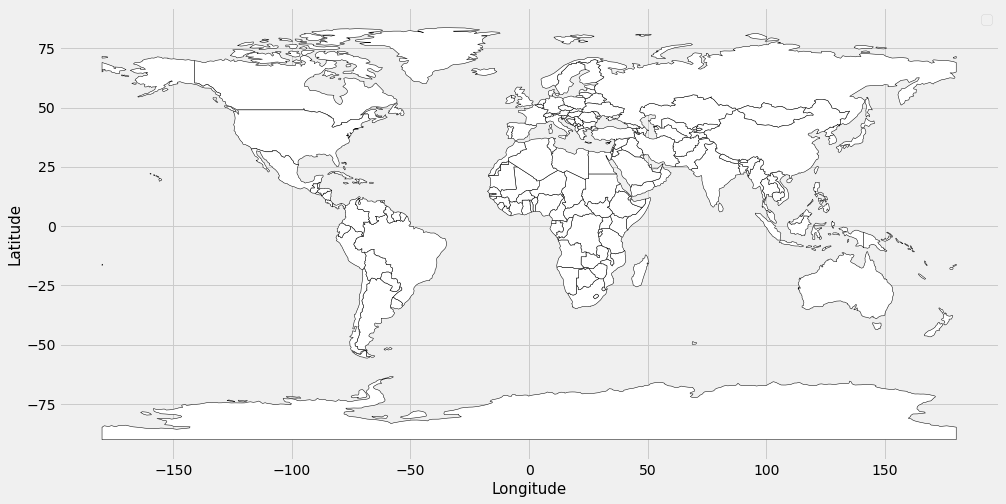

In [33]:
for i in range(6):
    loadquakes.plot_map(25, D_detrend_eq_values[i])

### Plotting all PCs on the same map

In [20]:
def plot_same_map(eq_load1, eq_load2, load_bounds1, load_bounds2, label1, label2):

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ax = world.plot(color='white', edgecolor='black', figsize=(15,10))

    # first PC
    gdf = gpd.GeoDataFrame(load_bounds1,
                       geometry=gpd.points_from_xy(load_bounds1.longitude, load_bounds1.latitude))
    gdf.plot(ax=ax, label=label1)


    # second pc
    gdf = gpd.GeoDataFrame(load_bounds2,
                       geometry=gpd.points_from_xy(load_bounds2.longitude, load_bounds2.latitude))
    gdf.plot(ax=ax, label=label2)


    leg = ax.legend()
    ax.set_xlabel('Longitude', fontsize = 15)
    ax.set_ylabel("Latitude", fontsize = 15)
    plt.show()

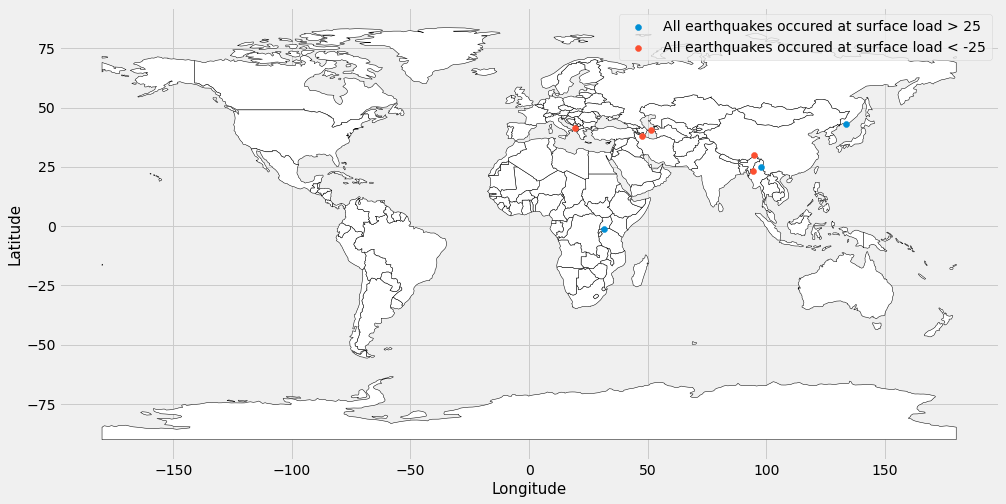

In [22]:
plot_same_map(mainshock['dmass'],mainshock['dmass'], 
              mainshock[mainshock['dmass'] > 25],
              mainshock[mainshock['dmass'] < -25], 
              'All earthquakes occured at surface load > 25',
              'All earthquakes occured at surface load < -25')

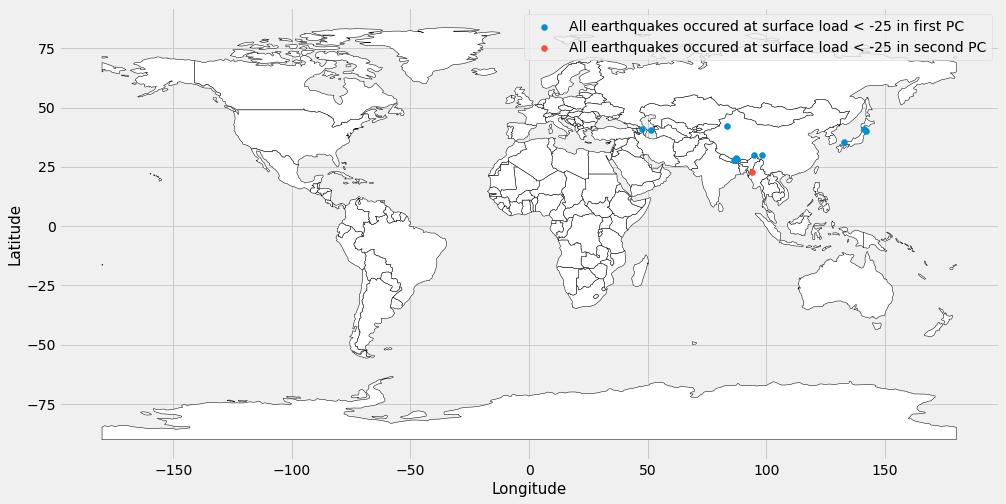

In [36]:
plot_same_map(D_eq_values[0],D_eq_values[1],
               catalog[D_eq_values[0] < -25],
               catalog[D_eq_values[1] < -25],
               'All earthquakes occured at surface load < -25 in first PC',
               'All earthquakes occured at surface load < -25 in second PC')

### Plotting all pcs on the same map for detrended data

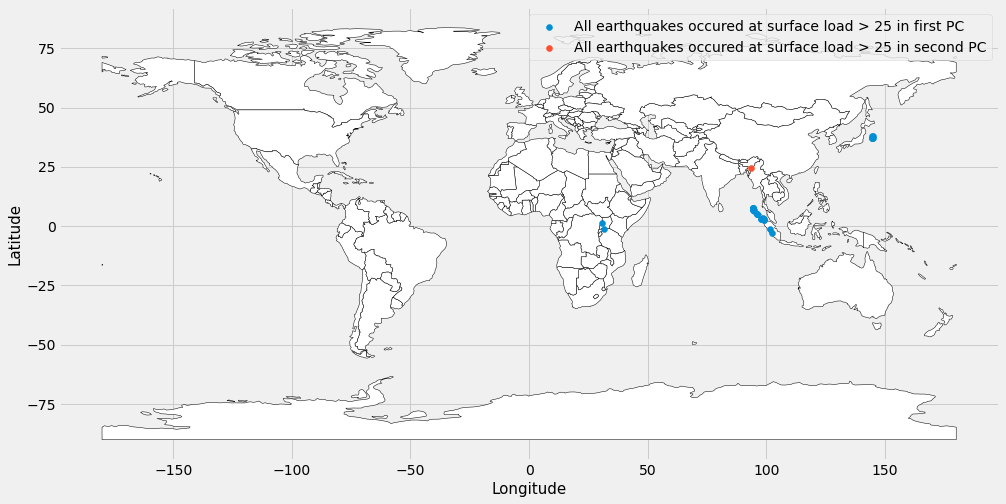

In [37]:
plot_same_map(D_detrend_eq_values[0],D_detrend_eq_values[1],
               catalog[D_detrend_eq_values[0] > 25],
               catalog[D_detrend_eq_values[1] > 25],
              'All earthquakes occured at surface load > 25 in first PC',
              'All earthquakes occured at surface load > 25 in second PC')

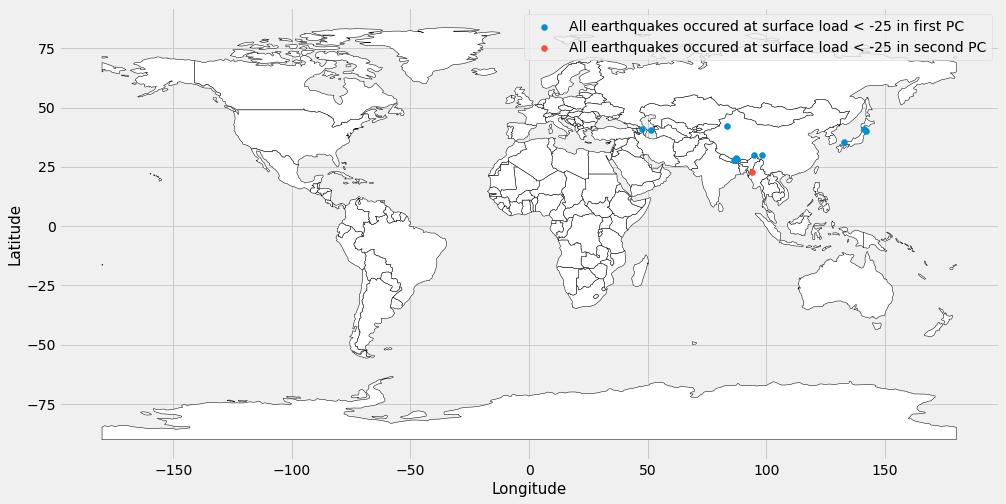

In [38]:
plot_same_map(D_detrend_eq_values[0],D_detrend_eq_values[1],
               catalog[D_detrend_eq_values[0] < -25],
               catalog[D_detrend_eq_values[1] < -25],
               'All earthquakes occured at surface load < -25 in first PC',
               'All earthquakes occured at surface load < -25 in second PC')

## Map of earthquakes with relative probability > 2

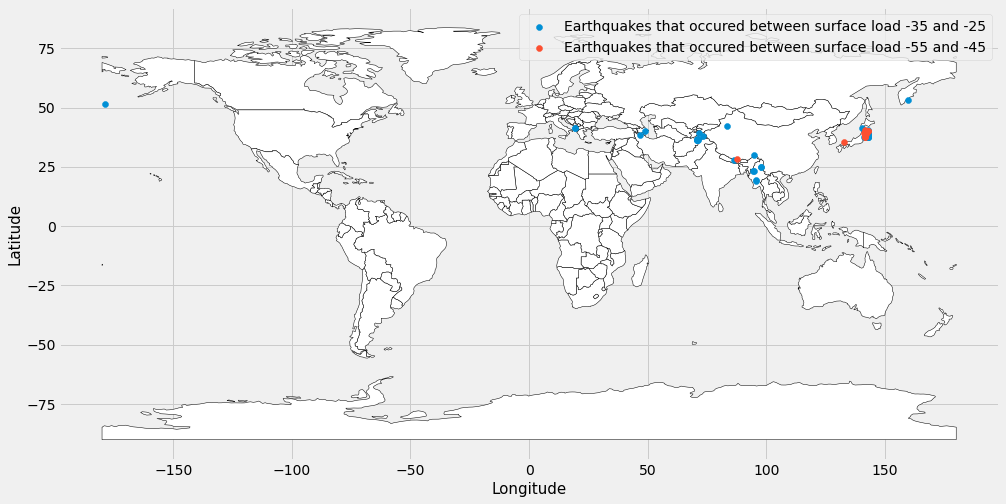

In [39]:
plot_same_map(catalog['dmass'],catalog['dmass'],
             catalog[(-35 < catalog['dmass']) & (catalog['dmass'] < -25)],
             catalog[(-55 < catalog['dmass']) & (catalog['dmass'] < -45)],
             'Earthquakes that occured between surface load -35 and -25',
             'Earthquakes that occured between surface load -55 and -45')

## Figures for poster

In [40]:
def set_of_figures(all_time, earthquake_only):

    fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,5))

    plt.style.use('fivethirtyeight')
    plot_hist(all_time, earthquake_only, ax1, ax2, 
              'A. Cumulative Distribution', 'B. Probability Density')

    plot_rel_hist(all_time, earthquake_only, ax3, 
                  'C. Relative probability of earthquake')

    fig.tight_layout()

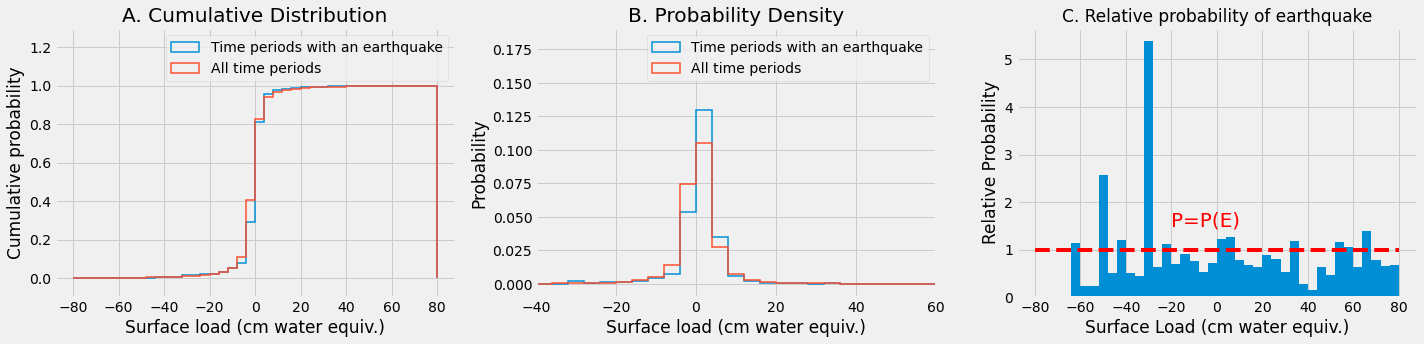

In [41]:
# Main result

set_of_figures(ds['lwe_thickness'].data.flatten(),catalog['dmass'])

<ipython-input-8-09c3742a08c2>:10: RuntimeWarning: invalid value encountered in true_divide
  ax.bar(bins[:-1]+wid/2,LgE/L,width=wid)


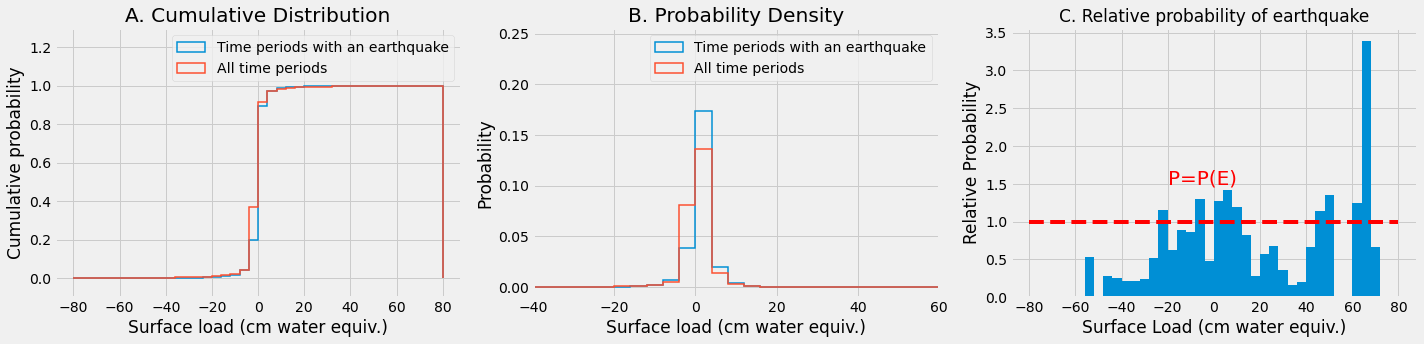

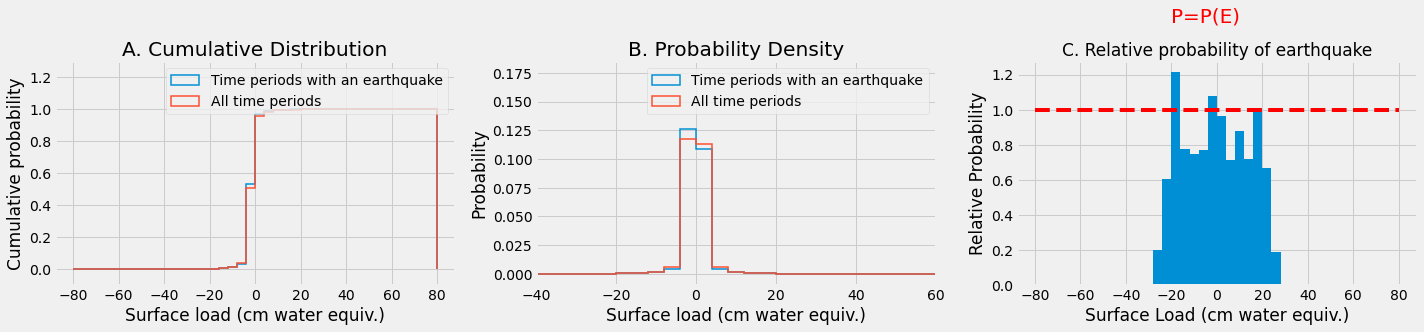

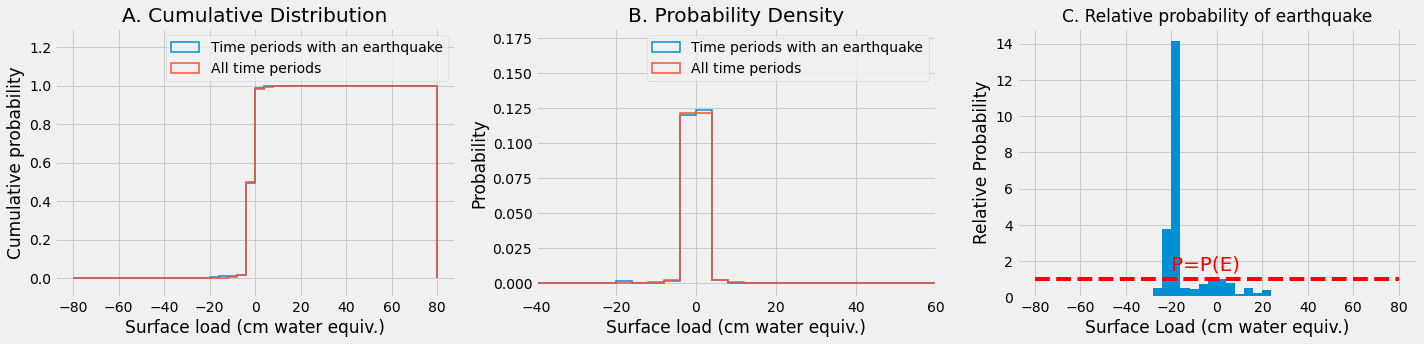

In [42]:
# Correlation using PCs

for i in range(3):
    set_of_figures(D_values[i].flatten(), D_eq_values[i])

<ipython-input-8-09c3742a08c2>:10: RuntimeWarning: invalid value encountered in true_divide
  ax.bar(bins[:-1]+wid/2,LgE/L,width=wid)


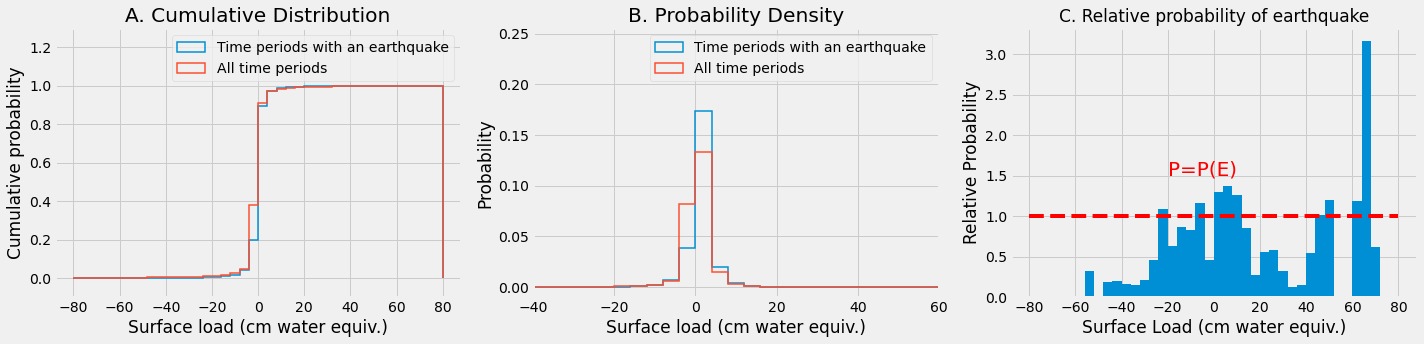

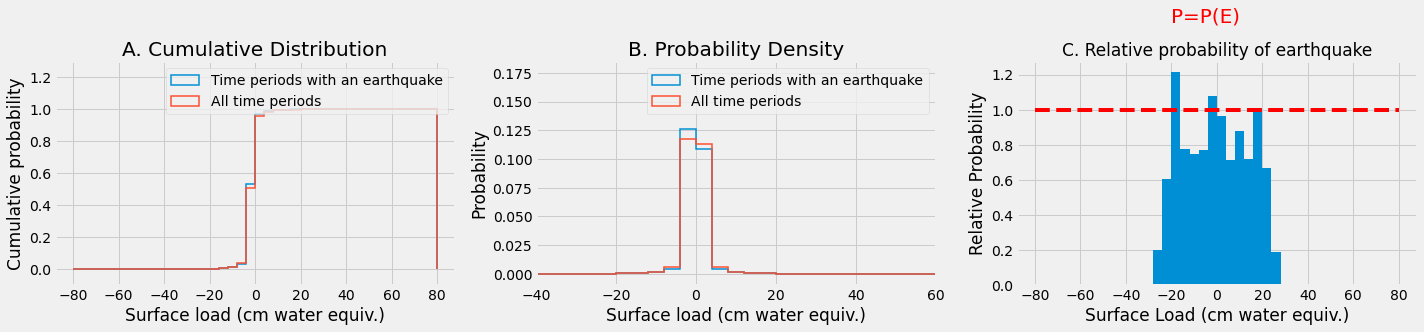

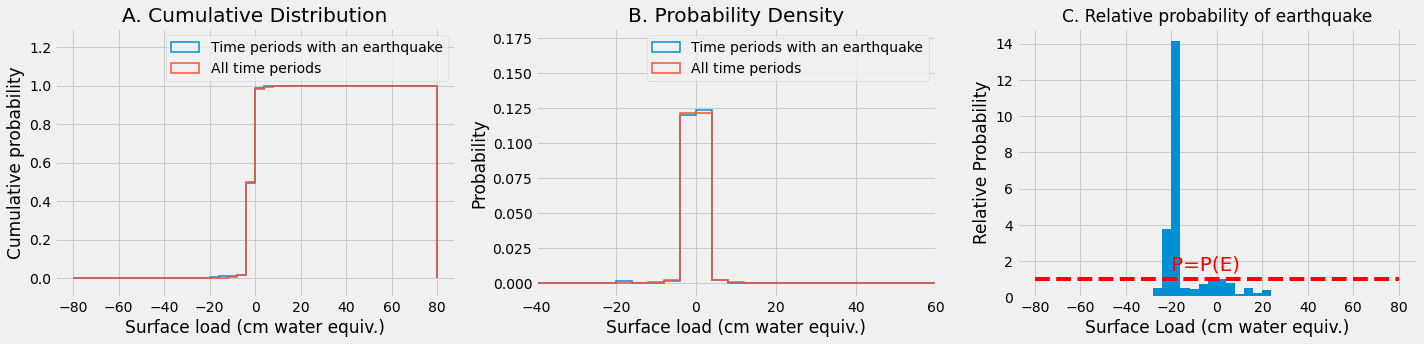

In [43]:
# Detrended PCs

for i in range(3):
    set_of_figures(D_detrend_values[i].flatten(), D_detrend_eq_values[i])

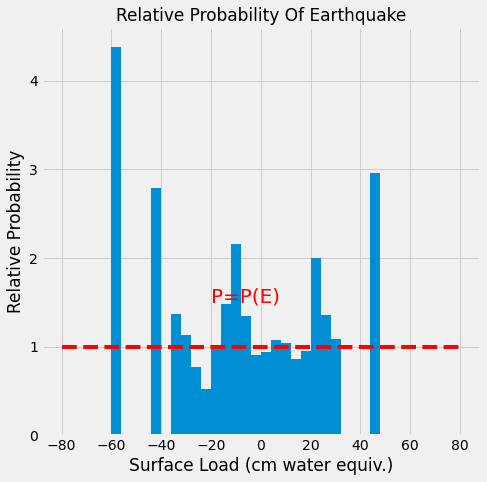

In [28]:
fig,ax = plt.subplots(figsize=(7,7))
plt.style.use('fivethirtyeight')
loadquakes.plot_rel_hist(np.array(ds['lwe_thickness'].data.flatten()), np.array(mainshock.dmass), ax, 
              "Relative Probability Of Earthquake")

## Mapping earthquakes with high conditional probability

In [26]:
# 1. Find which bin the load is in

surface_load = np.array(mainshock.dmass) # --- loading values during an earthquake
bins = np.linspace(-80,80,41)
which_bin = np.digitize(surface_load,bins)

# 2. Find height of bin

LgE = np.histogram(np.array(mainshock.dmass), bins=bins, density = True)[0]
L   = np.histogram(np.array(ds['lwe_thickness'].data.flatten()),bins=bins, density = True)[0]

height = LgE/L

# 3. Find loading with conditional probability > 2

high_cond_prob = height[height > 2]

# What is the height of the bin with high conditional probability?

indices = np.where(np.in1d(height, high_cond_prob))[0]

for i in range(len(indices)):
    print(height[indices[i]])
    
# Find height of bin from which_bin --- doesn't work!

Bin_Heights = []

for i in range(500):
    Bin_Heights.append(height[which_bin[i]])

4.3847146231351095
2.7919234320416533
2.152785469064513
2.95557335751713


In [27]:
Bin_Heights

[1.0708502599053626,
 1.0415951107607297,
 1.0415951107607297,
 1.0708502599053626,
 0.9362483147324837,
 1.0708502599053626,
 1.3435828428020309,
 1.0708502599053626,
 0.9362483147324837,
 0.8638011229873136,
 1.0415951107607297,
 1.0708502599053626,
 1.0708502599053626,
 0.9362483147324837,
 1.0708502599053626,
 1.0415951107607297,
 1.0415951107607297,
 1.0708502599053626,
 0.8638011229873136,
 1.0708502599053626,
 1.0415951107607297,
 1.0708502599053626,
 1.0708502599053626,
 0.9362483147324837,
 1.0708502599053626,
 0.9083521637699975,
 0.9362483147324837,
 1.0708502599053626,
 1.0415951107607297,
 1.0708502599053626,
 1.0415951107607297,
 2.152785469064513,
 1.0708502599053626,
 1.0708502599053626,
 1.0708502599053626,
 1.0708502599053626,
 0.0,
 1.0415951107607297,
 1.0415951107607297,
 1.3435828428020309,
 2.152785469064513,
 0.7748913528779269,
 0.9362483147324837,
 1.0415951107607297,
 0.8638011229873136,
 1.0708502599053626,
 1.0415951107607297,
 0.9461343182477984,
 0.908352

In [316]:
# df = pd.DataFrame({'Surface Load': surface_load,
#                    'Corresponding Bin': which_bin,
#                   'Bin Height': Bin_Heights})

# df

In [29]:
def high_cond_prob(earthquake_only, all_time_periods, bins):
    
    LgE = np.histogram(earthquake_only, bins=bins, density = True)[0]
    L   = np.histogram(all_time_periods,bins=bins, density = True)[0]
    
    which_bin = np.digitize(earthquake_only,bins)
    height = LgE/L
    high_cond_prob = height[height > 2]
    
    indices = np.where(np.in1d(height, high_cond_prob))[0]
     
    print("Bin number =")
    print(indices)
    
    print("Surface load = ")
    for i in range(len(indices)):
        print("Between")
        print(bins[indices[i-1]])
        print("and")
        print(bins[indices[i-1]+1])
        
    print("Corresponding bin height = ")
    for i in range(len(indices)):
        print(height[indices[i-1]])

In [30]:
np.where(height > 2)

(array([ 5,  9, 17, 31]),)

In [74]:
def get_cond_probability(all_time_periods, earthquake_only, loads):
    
    bins = np.linspace(-80,80,int(1 + 3.322*np.log(earthquake_only.size)))
    LgE = np.histogram(earthquake_only, bins=bins, density = True)[0]
    L   = np.histogram(all_time_periods,bins=bins, density = True)[0]
    
#     print(bins)
#     print(bins - load)

    cp = []

    for load in loads:
        
        this_bin = bins[0]
        i = 0
    
        while this_bin < load:
            i = i + 1
            this_bin = bins[i]
        cp.append(LgE[i-1]/L[i-1])
        
    return np.array(cp)
    

In [75]:
conditional_probability = get_cond_probability(np.array(ds['lwe_thickness'].data.flatten()),
                                                      np.array(mainshock.dmass), np.array(mainshock.dmass))

In [78]:
mainshock['cp'] = conditional_probability

In [85]:
mainshock[mainshock.cp > 1.5].sort_values('magnitude')

target_id  latitude  longitude                    time  magnitude  \
3930       3934    4.1909    86.7252 2014-03-27 04:00:15.540        5.4   
8569       8573    6.7050   -72.9460 2007-05-06 04:47:13.680        5.4   
753         757   33.0779    73.7936 2019-09-24 11:01:54.990        5.4   
2879       2883   29.3985    81.6541 2015-12-18 22:16:56.550        5.4   
2408       2412   39.4848    54.5087 2016-10-26 14:15:40.610        5.4   
1219       1223   27.1986    96.9185 2018-11-28 10:17:06.970        5.4   
9393       9397   23.7770    70.8990 2006-03-07 18:20:46.110        5.5   
4923       4927   27.7670   100.7810 2012-06-24 07:59:34.860        5.5   
2243       2247  -20.1600    46.6469 2017-01-11 22:06:58.670        5.5   
7251       7255   10.2000   -67.0100 2009-05-04 09:10:20.900        5.5   
1059       1063   -3.2806    90.2747 2019-03-10 07:53:20.170        5.5   
604         608   34.1326    60.2681 2020-01-02 04:29:06.582        5.5   
1176       1180  -20.6428    32.8029 2018-12-22 05:37:38.870        5.6   
5286       5290   43.6480    82.4370 2011-11-01 00:21:28.090        5.6   
747         751   40.9035    28.1502 2019-09-26 10:59:25.648        5.7   
4265       4269   30.0464    97.9565 2013-08-11 21:23:41.310        5.7   
4410       4414   33.0610    75.8630 2013-05-01 06:57:13.480        5.7   
6848       6852  -10.1260    33.8700 2009-12-06 17:36:36.010        5.8   
7668       7672   32.3080    47.3500 2008-08-27 21:52:38.110        5.8   
4668       4672   33.5060    59.5710 2012-12-05 17:08:13.560        5.8   
9414       9418   26.9120    91.7050 2006-02-23 20:04:53.550        5.8   
2029       2033   46.8811  -112.5753 2017-07-06 06:30:17.000        5.8   
1173       1177   30.4079    87.6200 2018-12-23 19:32:22.060        5.8   
6263       6267   29.6370    51.6660 2010-09-27 11:22:45.180        5.9   
689         693   37.8026    47.5814 2019-11-07 22:47:07.041        5.9   
2334       2338   43.8229    86.3451 2016-12-08 05:15:04.600        6.0   
5311       5315   54.0800   123.7220 2011-10-14 06:10:14.600        6.0   
4917       4921   43.4330    84.7000 2012-06-29 21:07:33.860        6.3   
1959       1963   41.3324   129.0297 2017-09-03 03:30:01.760        6.3   
4855       4859   38.3290    46.8260 2012-08-11 12:23:18.190        6.4   
4449       4453   28.4280    51.5930 2013-04-09 11:52:49.920        6.4   
96          100   45.4244    16.2573 2020-12-29 11:19:54.762        6.4   
3284       3288   28.2305    84.7314 2015-04-25 06:11:25.950        7.8   

                               geometry            mu  P_triggered  \
3930             POINT (4.1909 86.7252)  8.774521e-11     0.730205   
8569              POINT (6.705 -72.946)  8.774521e-11     0.488851   
753             POINT (33.0779 73.7936)  8.774521e-11     0.832465   
2879            POINT (29.3985 81.6541)  8.774521e-11     0.890007   
2408            POINT (39.4848 54.5087)  8.774521e-11     0.315486   
1219  POINT (27.1986 96.91849999999999)  8.774521e-11     0.706344   
9393              POINT (23.777 70.899)  8.774521e-11     0.149997   
4923             POINT (27.767 100.781)  8.774521e-11     0.703564   
2243             POINT (-20.16 46.6469)  8.774521e-11     0.009374   
7251    POINT (10.2 -67.01000000000001)  8.774521e-11     0.215597   
1059            POINT (-3.2806 90.2747)  8.774521e-11     0.511560   
604             POINT (34.1326 60.2681)  8.774521e-11     0.774443   
1176           POINT (-20.6428 32.8029)  8.774521e-11     0.846264   
5286   POINT (43.648 82.43700000000003)  8.774521e-11     0.820011   
747             POINT (40.9035 28.1502)  8.774521e-11     0.791945   
4265  POINT (30.0464 97.95650000000001)  8.774521e-11     0.812201   
4410              POINT (33.061 75.863)  8.774521e-11     0.818857   
6848              POINT (-10.126 33.87)  8.774521e-11     0.115178   
7668               POINT (32.308 47.35)  8.774521e-11     0.594874   
4668   POINT (33.506 59.57100000000001)  8.774521e-11  

No handles with labels found to put in legend.


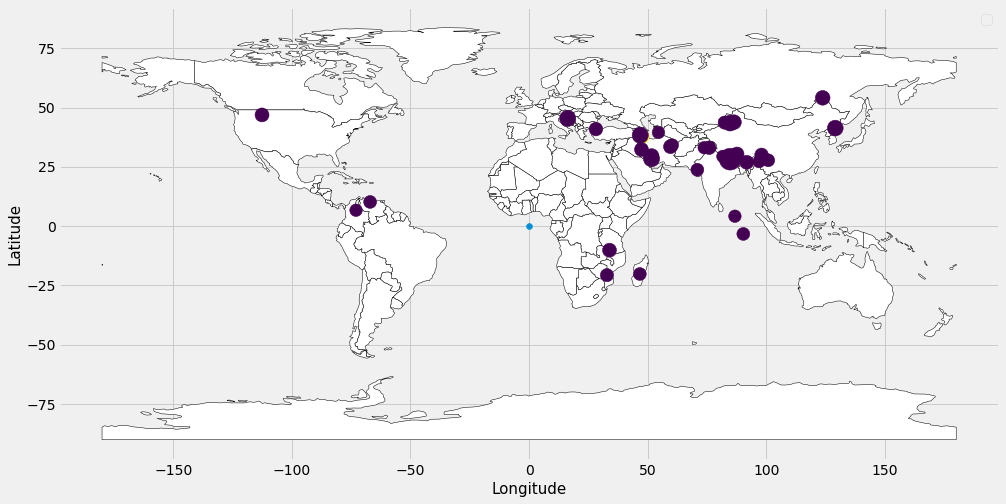

In [96]:
load_bounds = mainshock[mainshock['cp']>1.5]

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black', figsize=(15,10))

gdf = gpd.GeoDataFrame(load_bounds,
                       geometry=gpd.points_from_xy(load_bounds.longitude, load_bounds.latitude))
gdf.plot(ax=ax, markersize = load_bounds.magnitude**3, c = load_bounds.cp/max(load_bounds.cp))
ax.scatter(0,0)
leg = ax.legend()
ax.set_xlabel('Longitude', fontsize = 15)
ax.set_ylabel("Latitude", fontsize = 15)
plt.show()

In [31]:
high_cond_prob(np.array(mainshock.dmass),np.array(ds['lwe_thickness'].data.flatten()),bins)

Bin number =
[ 5  9 17 31]
Surface load = 
Between
44.0
and
48.0
Between
-60.0
and
-56.0
Between
-44.0
and
-40.0
Between
-12.0
and
-8.0
Corresponding bin height = 
2.95557335751713
4.3847146231351095
2.7919234320416533
2.152785469064513


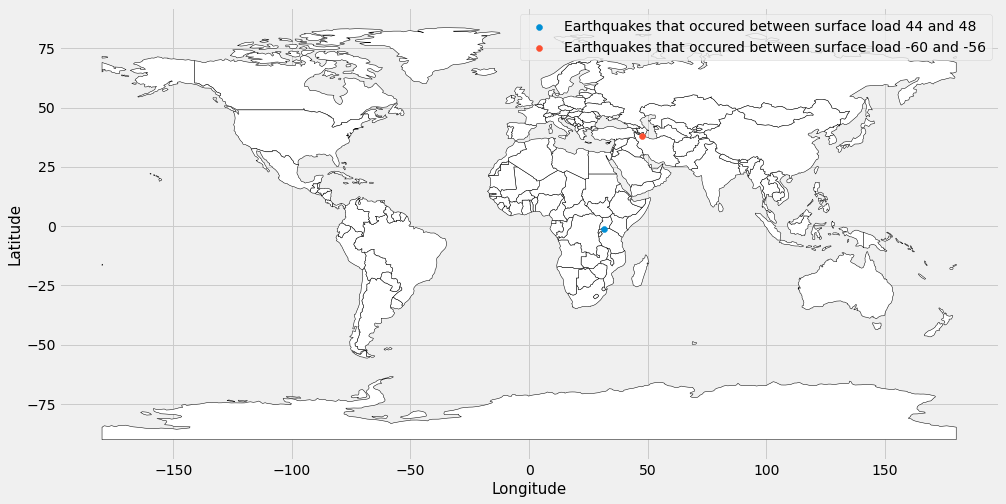

In [32]:
plot_same_map(mainshock['dmass'],mainshock['dmass'],
             mainshock[(44 < mainshock['dmass']) & (mainshock['dmass'] < 48)],
             mainshock[(-60 < mainshock['dmass']) & (mainshock['dmass'] < -56)],
             'Earthquakes that occured between surface load 44 and 48',
             'Earthquakes that occured between surface load -60 and -56')

In [57]:
mainshock[mainshock['dmass'] < -40]

target_id  latitude  longitude                    time  magnitude  \
689         693   37.8026    47.5814 2019-11-07 22:47:07.041        5.9   
3758       3762   40.3731    51.5739 2014-06-07 06:05:29.910        5.5   

                     geometry            mu  P_triggered  P_background  \
689   POINT (37.8026 47.5814)  8.774521e-11     0.889156      0.110844   
3758  POINT (40.3731 51.5739)  8.774521e-11     0.690364      0.309636   

                   dmass  
689   -56.12582084324727  
3758  -43.02544922049019

In [233]:
high_cond_prob(D_eq_values[0],D_values[0],bins)

Bin number =
[36]
Surface load = 
Between
64.0
and
68.0
Corresponding bin height = 
3.3910386439639204


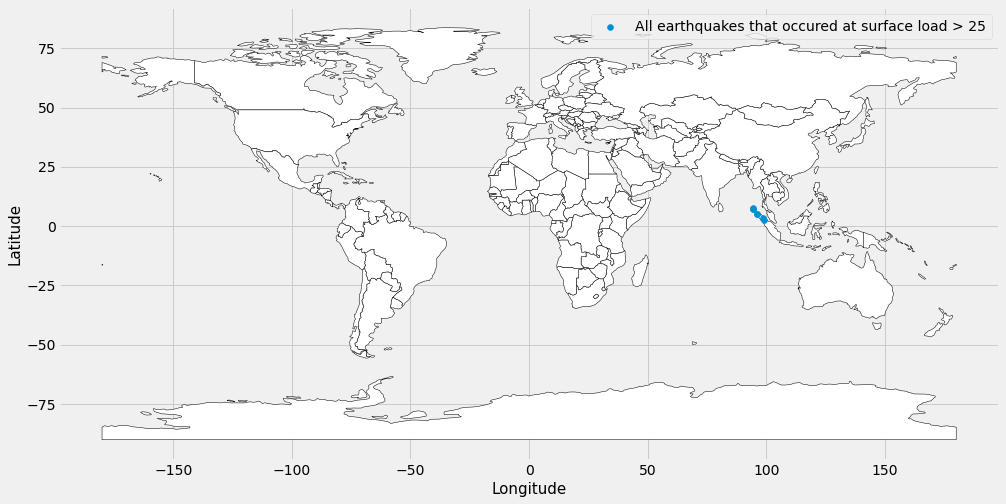

In [234]:
plot_map(64,D_eq_values[0])

40

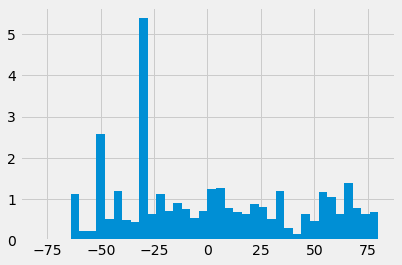

In [98]:
bins = np.linspace(-80,80,41)
LgE = np.histogram(np.array(catalog.dmass), bins=bins, density = True)[0]
L   = np.histogram(np.array(ds['lwe_thickness'].data.flatten()),bins=bins, density = True)[0]

wid = np.mean(np.diff(bins))
plt.bar(bins[:-1]+wid/2,LgE/L,width=wid)